In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import statsmodels.formula.api as smf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


In [2]:
df= pd.read_csv('/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv')

# **Data Cleaning**

In [3]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0','Url_spotify','Uri','Url_youtube','Comments','Description'],axis=1,inplace=True)

In [6]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.772,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.852,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.551,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.578,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.525,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,True,True,6.172597e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Title             20248 non-null  object 
 16  Channel           20248 non-null  object

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19624 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19624 non-null  object 
 1   Track             19624 non-null  object 
 2   Album             19624 non-null  object 
 3   Album_type        19624 non-null  object 
 4   Danceability      19624 non-null  float64
 5   Energy            19624 non-null  float64
 6   Key               19624 non-null  float64
 7   Loudness          19624 non-null  float64
 8   Speechiness       19624 non-null  float64
 9   Acousticness      19624 non-null  float64
 10  Instrumentalness  19624 non-null  float64
 11  Liveness          19624 non-null  float64
 12  Valence           19624 non-null  float64
 13  Tempo             19624 non-null  float64
 14  Duration_ms       19624 non-null  float64
 15  Title             19624 non-null  object 
 16  Channel           19624 non-null  object

In [10]:
duplicates= df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Artist, Track, Album, Album_type, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Title, Channel, Views, Likes, Licensed, official_video, Stream]
Index: []

[0 rows x 22 columns]


In [11]:
despacito= df[df['Track'] == 'Despacito']
despacito

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Licensed,official_video,Stream
365,Daddy Yankee,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.153,0.198,...,0.839,177.928,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079647e+09,50788626.0,True,True,1.506598e+09
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.153,0.198,...,0.839,177.928,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,True,True,1.506598e+09


In [12]:
#dropping duplicates of Track as the same song is repeated several times because it was produced by multiple authors
df=df.drop_duplicates(subset='Track')

In [13]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream
count,16933.000000,16933.000000,16933.000000,16933.000000,16933.000000,16933.000000,16933.000000,16933.000000,16933.000000,16933.000000,1.693300e+04,1.693300e+04,1.693300e+04,1.693300e+04
mean,0.618984,0.635170,5.279572,-7.681317,0.094757,0.288122,0.056622,0.191671,0.530404,120.649164,2.226282e+05,8.764205e+07,6.101200e+05,1.300812e+08
std,0.165575,0.215212,3.574264,4.638246,0.107232,0.287858,0.193818,0.165676,0.246824,29.672308,9.277157e+04,2.558429e+08,1.642168e+06,2.329909e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,6.574000e+03
25%,0.515000,0.505000,2.000000,-8.884000,0.035400,0.041400,0.000000,0.094000,0.339000,96.966000,1.807600e+05,1.813495e+06,2.129300e+04,1.695360e+07
50%,0.636000,0.666000,5.000000,-6.553000,0.050200,0.186000,0.000003,0.124000,0.537000,119.965000,2.134740e+05,1.378841e+07,1.171630e+05,4.815338e+07
75%,0.741000,0.800000,8.000000,-4.947000,0.102000,0.473000,0.000523,0.236000,0.729000,139.979000,2.521740e+05,6.640185e+07,4.809570e+05,1.330527e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079647e+09,5.078863e+07,3.386520e+09


# EDA

**Top 10 most viewed artists on Youtube**

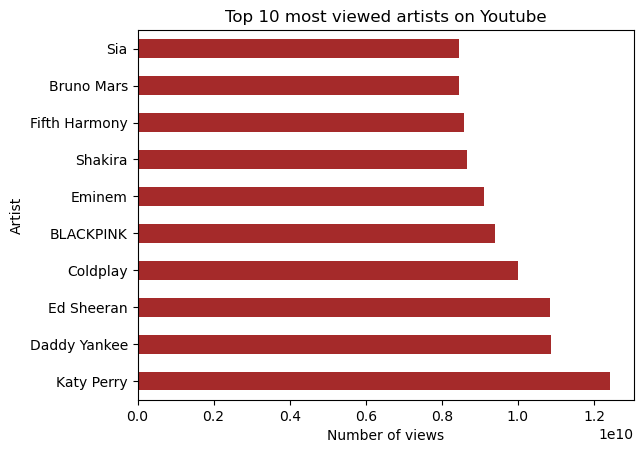

In [14]:
artists_yt= df.groupby('Artist').sum()['Views'].sort_values(ascending = False).head(10)

plt.title('Top 10 most viewed artists on Youtube')
plt.xlabel('Number of views')
artists_yt.plot.barh(x='Views',y='index',rot=0,color='#A52A2A');

**Top 10 most streamed artists on Spotify**

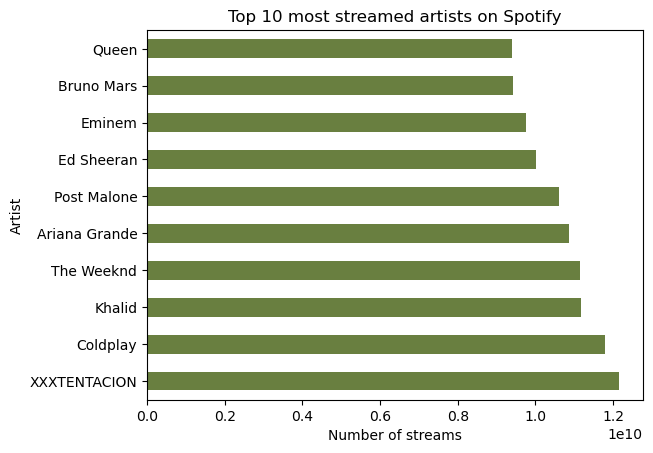

In [15]:
artists_spo= df.groupby('Artist').sum()['Stream'].sort_values(ascending = False).head(10)

plt.title('Top 10 most streamed artists on Spotify')
plt.xlabel('Number of streams')
artists_spo.plot.barh(x='Views',y='index',rot=0, color='#697F40');

**Top 5 viewed songs on YouTube**

,Track,Views,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Artist,,,,,,,,,,
Daddy Yankee,Despacito,8.079647e+09,0.655,0.797,0.1530,0.19800,0.000000,0.0670,0.839,177.928
Ed Sheeran,Shape of You,5.908398e+09,0.825,0.652,0.0802,0.58100,0.000000,0.0931,0.931,95.977
Wiz Khalifa,See You Again (feat. Charlie Puth),5.773797e+09,0.689,0.481,0.0815,0.36900,0.000001,0.0649,0.283,80.025
CoComelon,Wheels on the Bus,4.898831e+09,0.941,0.387,0.0427,0.18400,0.000029,0.1570,0.965,125.021
Mark Ronson,Uptown Funk (feat. Bruno Mars),4.821016e+09,0.856,0.609,0.0824,0.00801,0.000082,0.0344,0.928,114.988


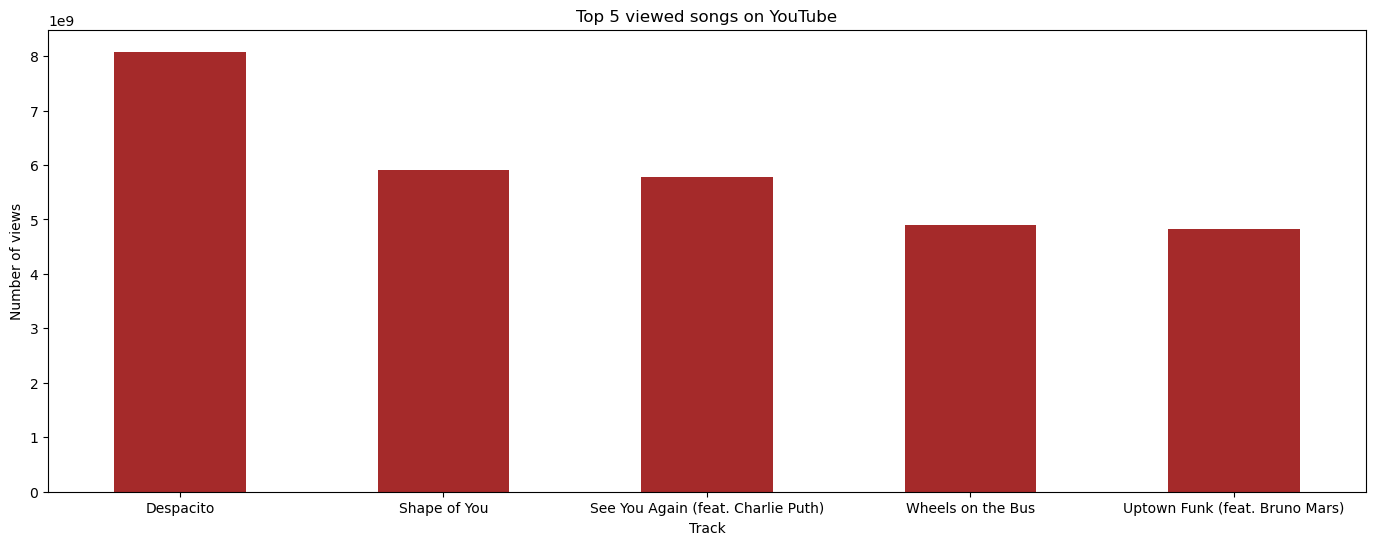

In [16]:
toppsongs_yt=df.sort_values('Views',ascending= False)[['Artist','Track','Views','Danceability', 
                                                       'Energy', 'Speechiness', 'Acousticness', 
                                                       'Instrumentalness', 'Liveness', 'Valence','Tempo']].head(5)

toppsongs_yt.plot(kind='bar',x='Track',y='Views',rot=0,color='#A52A2A',figsize=(17,6),
                  title='Top 5 viewed songs on YouTube',ylabel='Number of views',legend= 0);
toppsongs_yt.set_index('Artist')

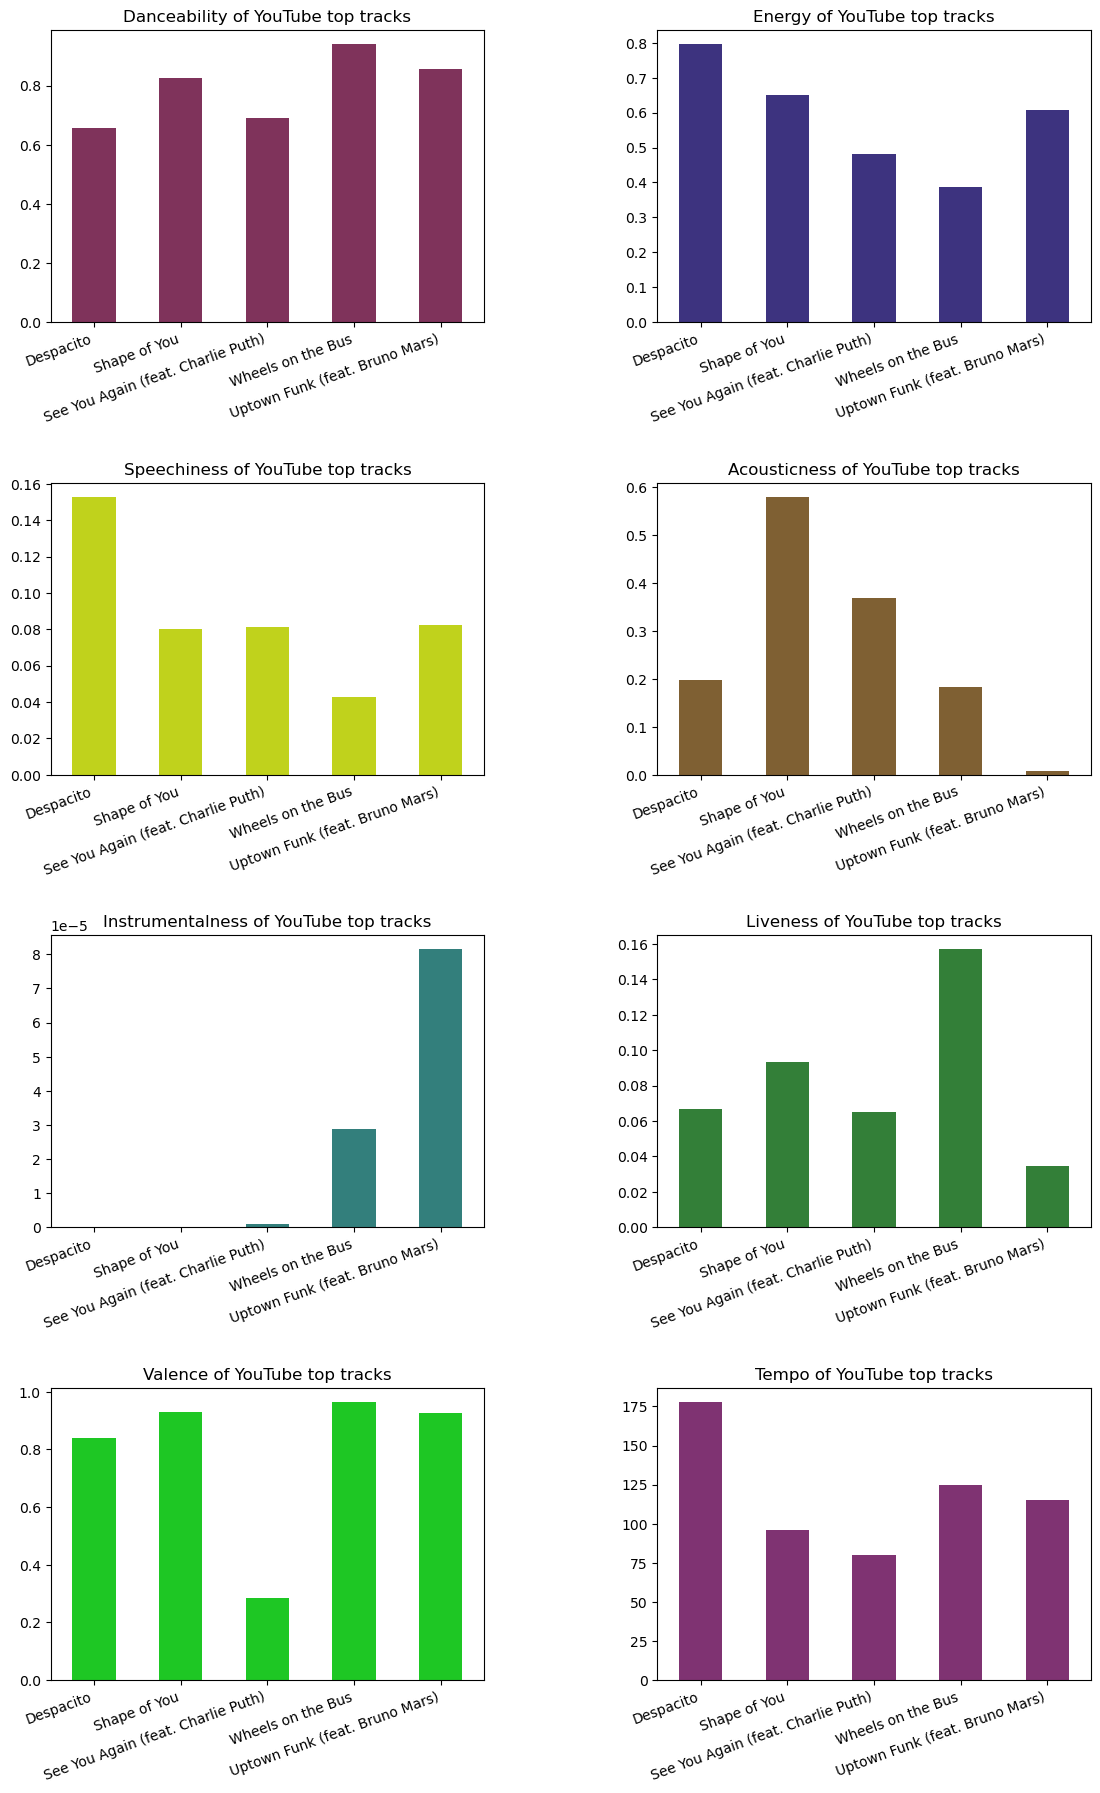

In [17]:
fig, axs= plt.subplots(nrows=4, ncols=2, figsize=(13,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.55)

toppsongs_yt.plot(kind='bar',x='Track',y='Danceability',color='#7F335B',legend=0,ax=axs[0,0],title='Danceability of YouTube top tracks')
axs[0,0].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[0,0].set(xlabel='')

toppsongs_yt.plot(kind='bar',x='Track',y='Energy',rot=0,color='#3D337F',legend=0,ax=axs[0,1],title='Energy of YouTube top tracks')
axs[0,1].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[0,1].set(xlabel='')

toppsongs_yt.plot(kind='bar',x='Track',y='Speechiness',rot=0,color='#C0D21C',legend=0,ax=axs[1,0],title='Speechiness of YouTube top tracks')
axs[1,0].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[1,0].set(xlabel='')

toppsongs_yt.plot(kind='bar',x='Track',y='Acousticness',rot=0,color='#7F6033',legend=0,ax=axs[1,1],title='Acousticness of YouTube top tracks')
axs[1,1].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[1,1].set(xlabel='')

toppsongs_yt.plot(kind='bar',x='Track',y='Instrumentalness',rot=0,color='#337F7C',legend=0,ax=axs[2,0],title='Instrumentalness of YouTube top tracks')
axs[2,0].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[2,0].set(xlabel='')

toppsongs_yt.plot(kind='bar',x='Track',y='Liveness',rot=0,color='#337F38',legend=0,ax=axs[2,1],title='Liveness of YouTube top tracks')
axs[2,1].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[2,1].set(xlabel='')

toppsongs_yt.plot(kind='bar',x='Track',y='Valence',rot=0,color='#1EC724',legend=0,ax=axs[3,0],title='Valence of YouTube top tracks')
axs[3,0].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[3,0].set(xlabel='')

toppsongs_yt.plot(kind='bar',x='Track',y='Tempo',rot=0,color='#7F3372',legend=0,ax=axs[3,1],title='Tempo of YouTube top tracks')
axs[3,1].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[3,1].set(xlabel='');

**Top 5 streamed songs on Spotify**

,Track,Stream,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Artist,,,,,,,,,,
The Weeknd,Blinding Lights,3.386520e+09,0.514,0.730,0.0598,0.00146,0.000095,0.0897,0.334,171.005
Ed Sheeran,Shape of You,3.362005e+09,0.825,0.652,0.0802,0.58100,0.000000,0.0931,0.931,95.977
Lewis Capaldi,Someone You Loved,2.634013e+09,0.501,0.405,0.0319,0.75100,0.000000,0.1050,0.446,109.891
Post Malone,rockstar (feat. 21 Savage),2.594927e+09,0.585,0.520,0.0712,0.12400,0.000070,0.1310,0.129,159.801
Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09,0.755,0.522,0.0575,0.53300,0.000000,0.0685,0.925,89.960


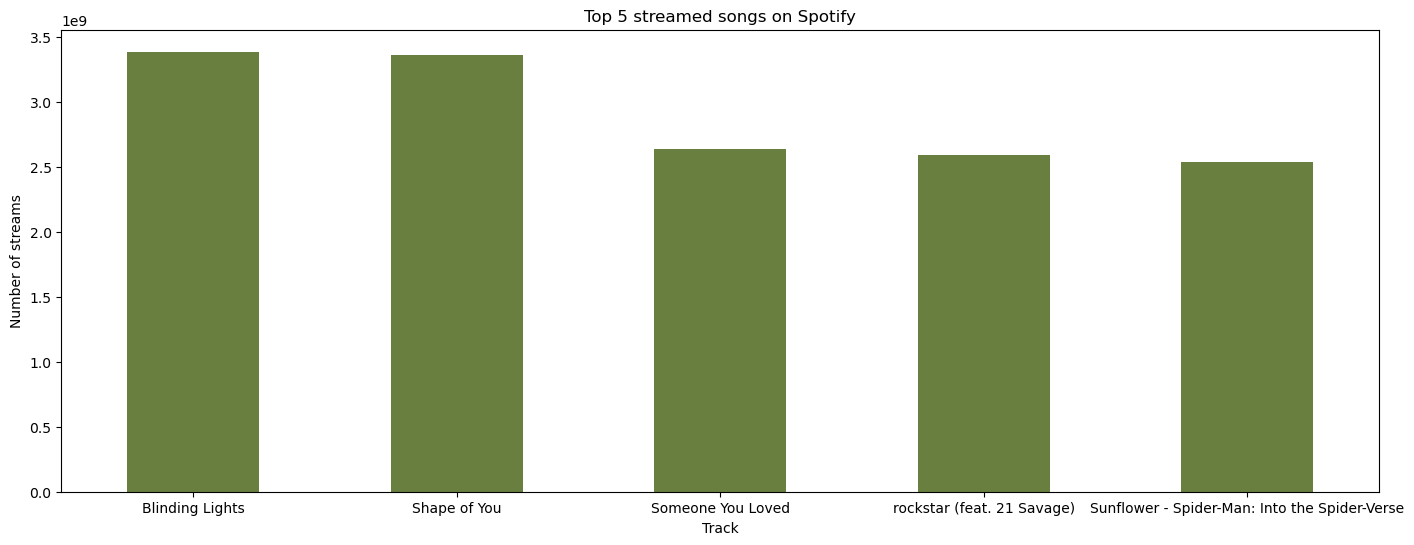

In [18]:
topsongs_spo=df.sort_values('Stream',ascending= False)[['Artist','Track','Stream','Danceability', 
                                                       'Energy', 'Speechiness', 'Acousticness', 
                                                       'Instrumentalness', 'Liveness', 'Valence','Tempo']].head(5)

topsongs_spo.plot(kind='bar', x='Track',y='Stream',rot=0,color='#697F40',figsize=(17,6),
                  title='Top 5 streamed songs on Spotify',ylabel='Number of streams',legend= 0);
topsongs_spo.set_index('Artist')

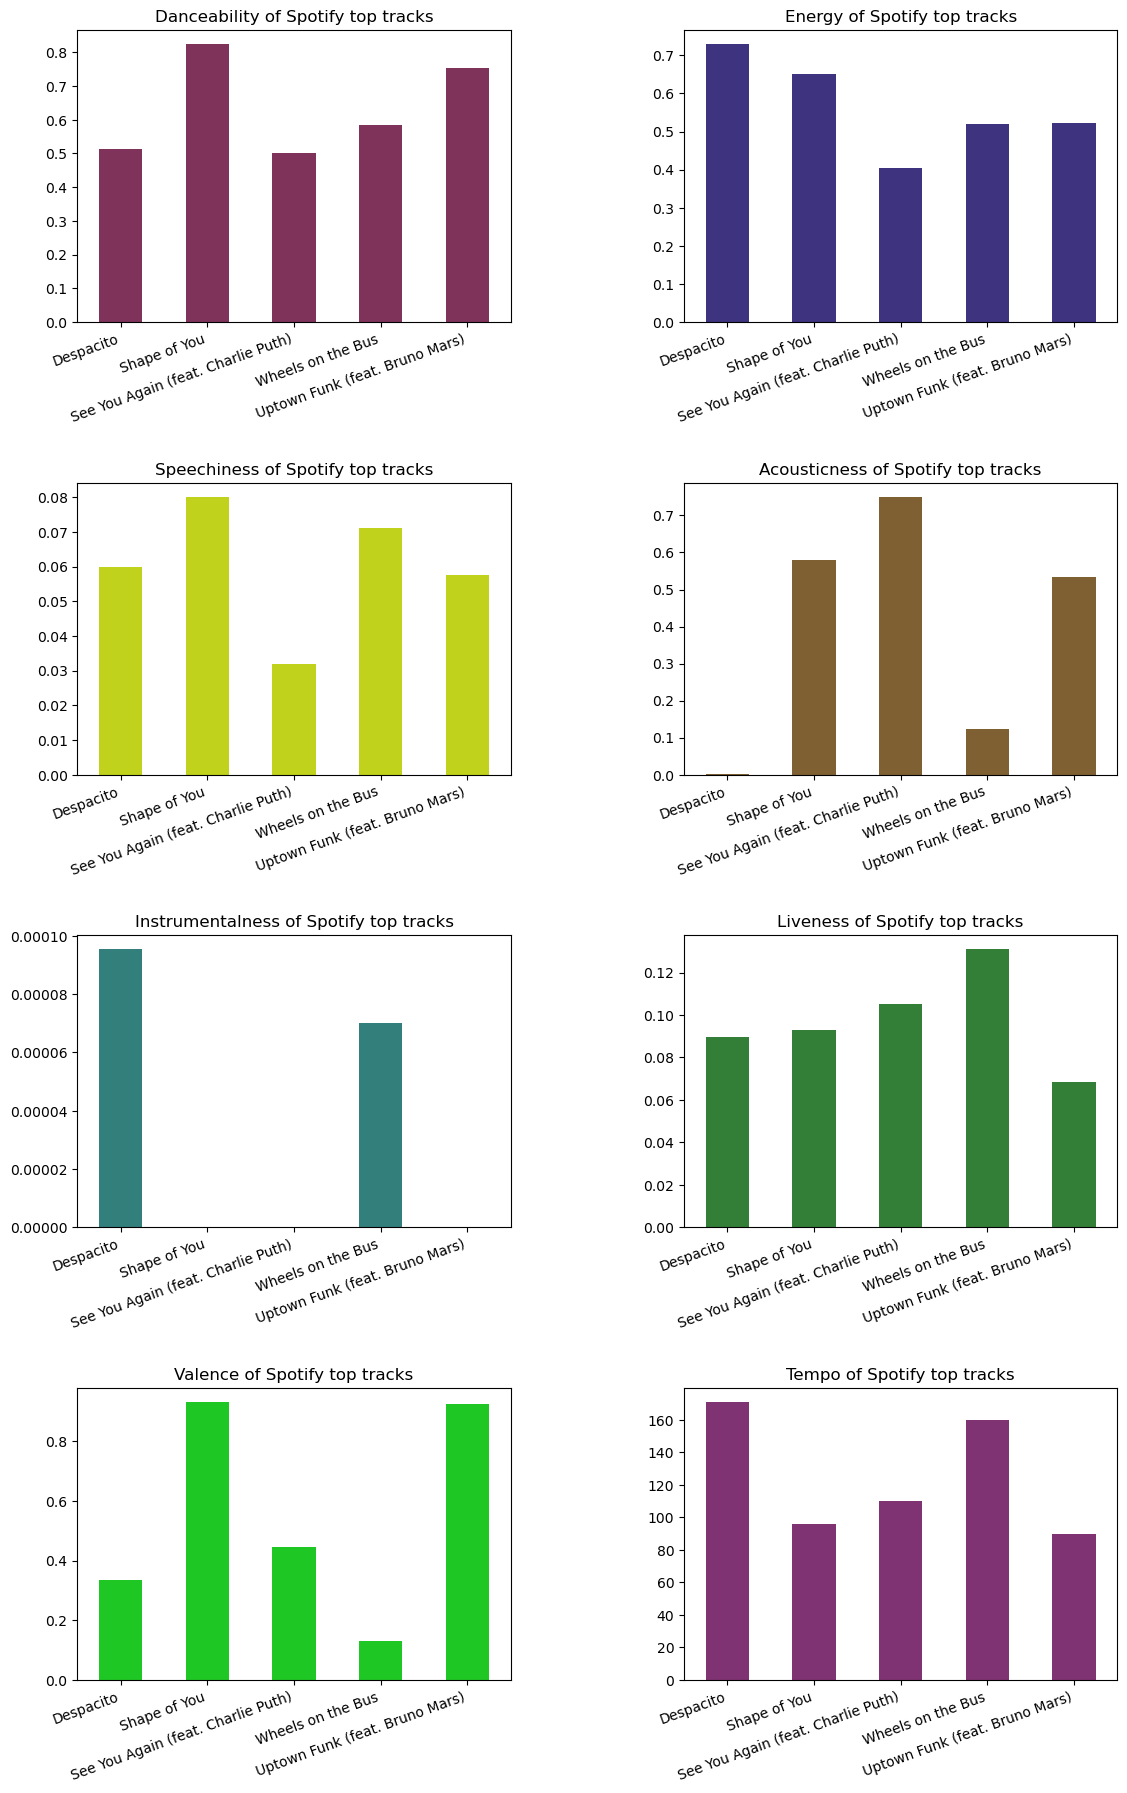

In [19]:
fig, axs= plt.subplots(nrows=4, ncols=2, figsize=(13,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.55)

topsongs_spo.plot(kind='bar',x='Track',y='Danceability',color='#7F335B',legend=0,ax=axs[0,0],title='Danceability of Spotify top tracks')
axs[0,0].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[0,0].set(xlabel='')

topsongs_spo.plot(kind='bar',x='Track',y='Energy',rot=0,color='#3D337F',legend=0,ax=axs[0,1],title='Energy of Spotify top tracks')
axs[0,1].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[0,1].set(xlabel='')

topsongs_spo.plot(kind='bar',x='Track',y='Speechiness',rot=0,color='#C0D21C',legend=0,ax=axs[1,0],title='Speechiness of Spotify top tracks')
axs[1,0].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[1,0].set(xlabel='')

topsongs_spo.plot(kind='bar',x='Track',y='Acousticness',rot=0,color='#7F6033',legend=0,ax=axs[1,1],title='Acousticness of Spotify top tracks')
axs[1,1].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[1,1].set(xlabel='')

topsongs_spo.plot(kind='bar',x='Track',y='Instrumentalness',rot=0,color='#337F7C',legend=0,ax=axs[2,0],title='Instrumentalness of Spotify top tracks')
axs[2,0].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[2,0].set(xlabel='')

topsongs_spo.plot(kind='bar',x='Track',y='Liveness',rot=0,color='#337F38',legend=0,ax=axs[2,1],title='Liveness of Spotify top tracks')
axs[2,1].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[2,1].set(xlabel='')

topsongs_spo.plot(kind='bar',x='Track',y='Valence',rot=0,color='#1EC724',legend=0,ax=axs[3,0],title='Valence of Spotify top tracks')
axs[3,0].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[3,0].set(xlabel='')

topsongs_spo.plot(kind='bar',x='Track',y='Tempo',rot=0,color='#7F3372',legend=0,ax=axs[3,1],title='Tempo of Spotify top tracks')
axs[3,1].set_xticklabels(toppsongs_yt['Track'], rotation=20, ha='right')
axs[3,1].set(xlabel='');

**Types of albums**

In [20]:
album_count=df['Album_type'].value_counts()
print(album_count)

album          12595
single          3744
compilation      594
Name: Album_type, dtype: int64


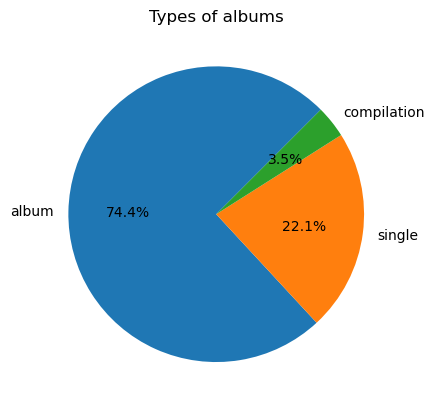

In [21]:
plt.title('Types of albums')
plt.pie(album_count.values.tolist(), labels=album_count.index.tolist(), autopct='%1.1f%%',
        startangle=45);

**Top albums popularity**

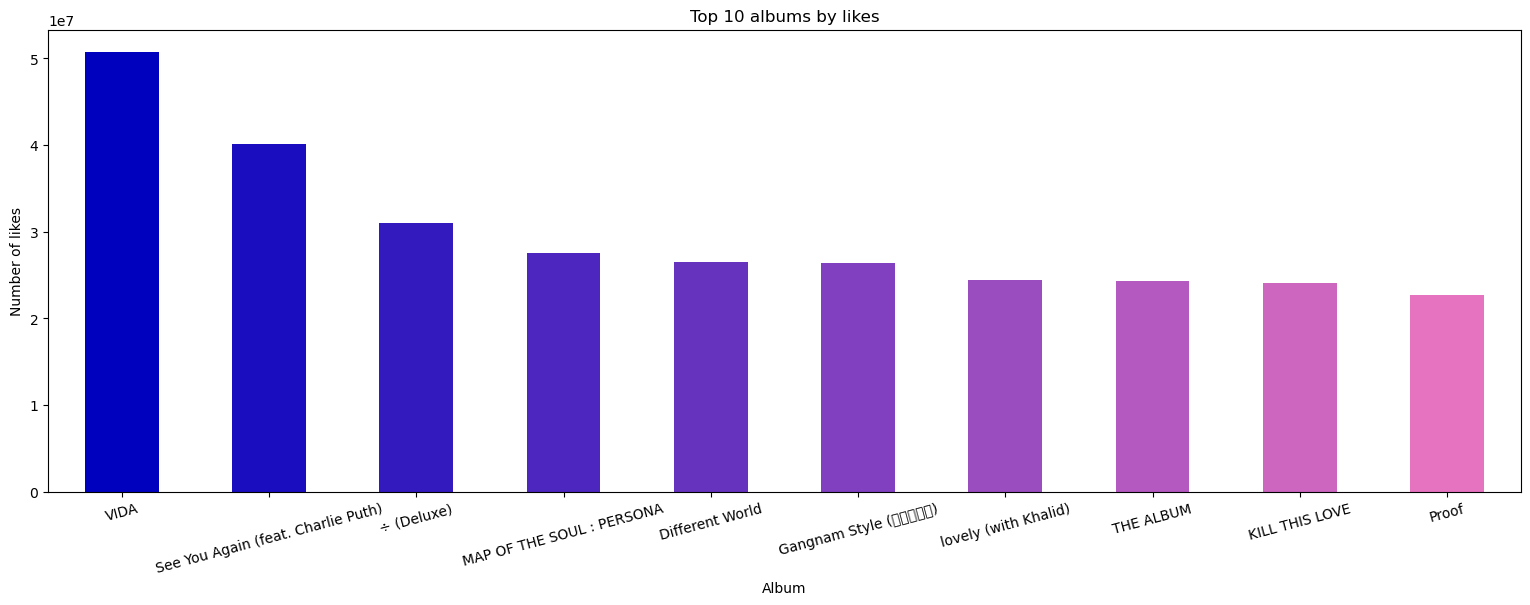

In [22]:
album_likes=df.sort_values('Likes',ascending= False)[['Artist','Album','Likes']].head(10)
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))]
album_likes.plot(kind='bar', x='Album',y='Likes',rot=15,color=my_colors,figsize=(19,6),
                  title='Top 10 albums by likes',ylabel='Number of likes', legend=0);

warnings.filterwarnings("ignore") #Hiding Glyph warning because of Korean alphabet in the title of the song

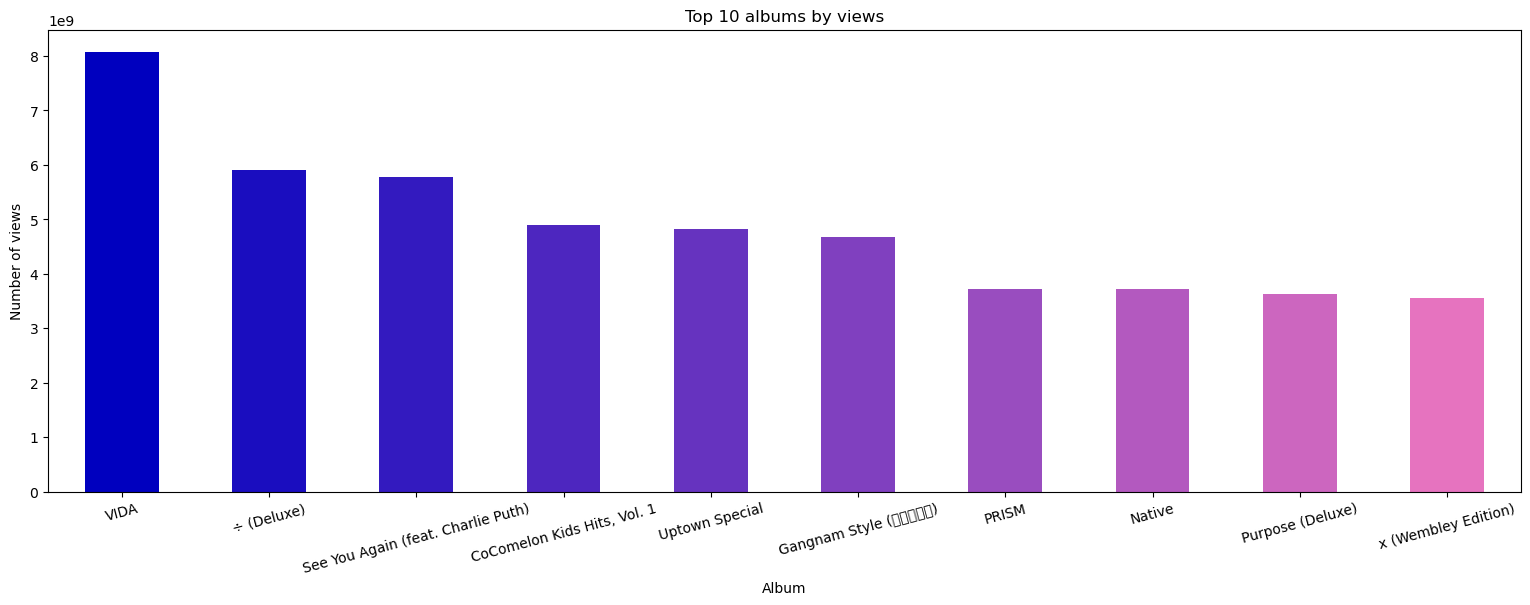

In [23]:
album_views=df.sort_values('Views',ascending= False)[['Artist','Album','Views']].head(10)
album_views.plot(kind='bar', x='Album',y='Views',rot=15,color=my_colors,figsize=(19,6),
                  title='Top 10 albums by views',ylabel='Number of views', legend=0);

warnings.filterwarnings("ignore") #Hiding Glyph warning because of Korean alphabet in the title of the song

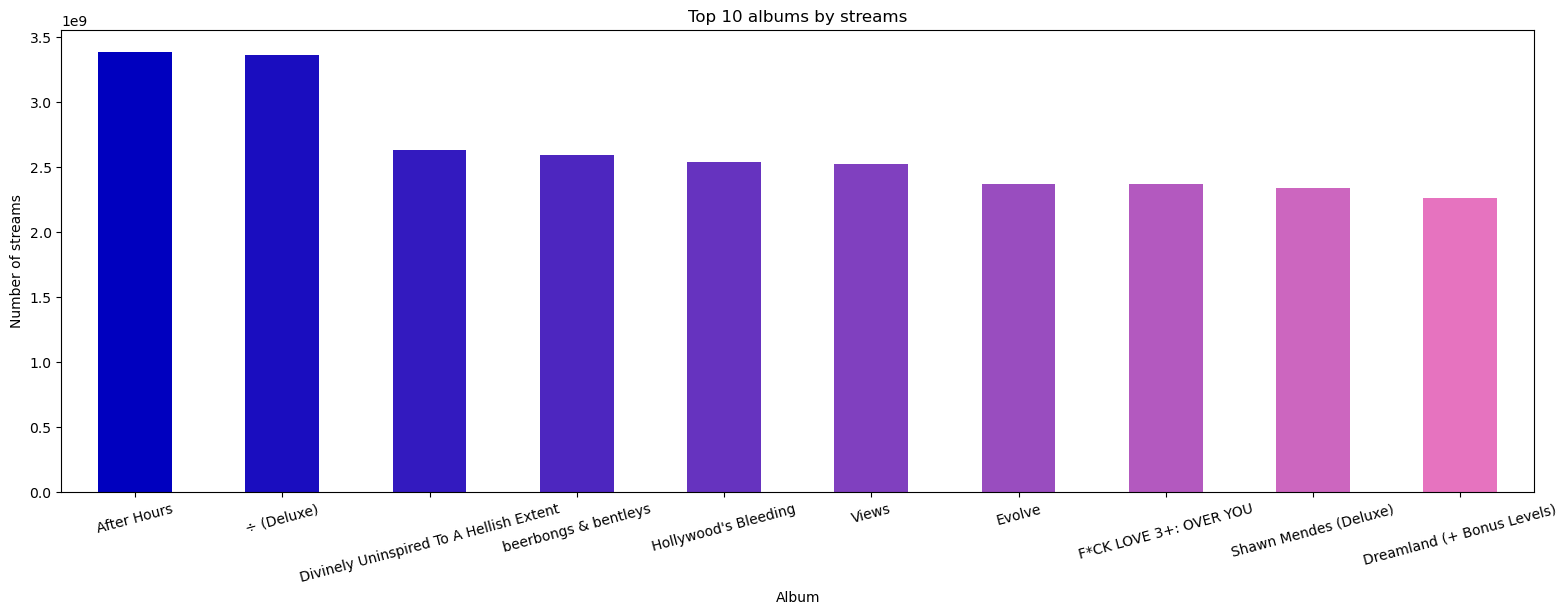

In [24]:
album_streams=df.sort_values('Stream',ascending= False)[['Artist','Album','Stream']].head(10)
album_streams.plot(kind='bar', x='Album',y='Stream',rot=15,color=my_colors,figsize=(19,6),
                  title='Top 10 albums by streams',ylabel='Number of streams', legend=0);

**Distribution of numerical values**

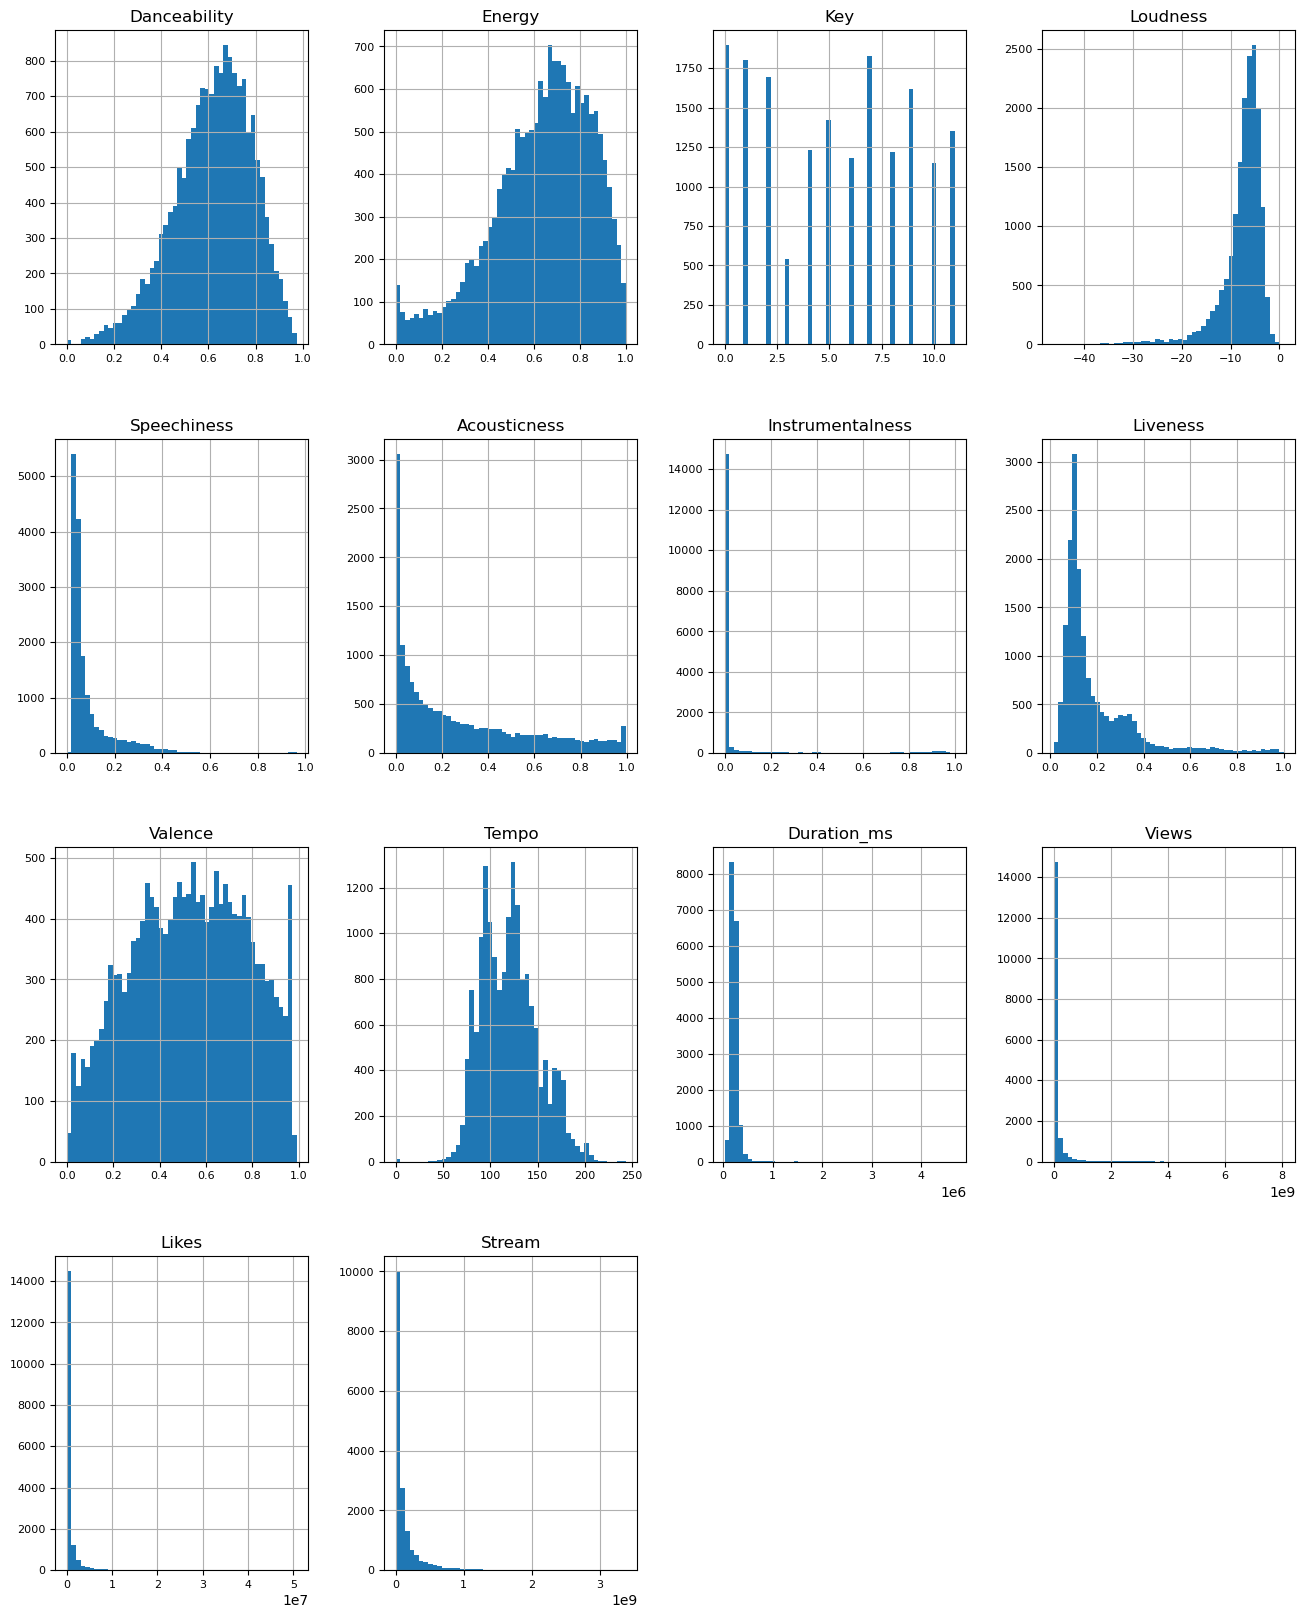

In [25]:
df_num_columns= df.select_dtypes(include=[np.number])
df_num_columns.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

As we can see Danceability and Energy seem to share similar distributions. What is more, visually 99% of Likes, Stream and Views lie between zero to one respectably which means that nearly all of the songs are not as successful as the most popular songs which are large outliers.

**Correlation matrix**

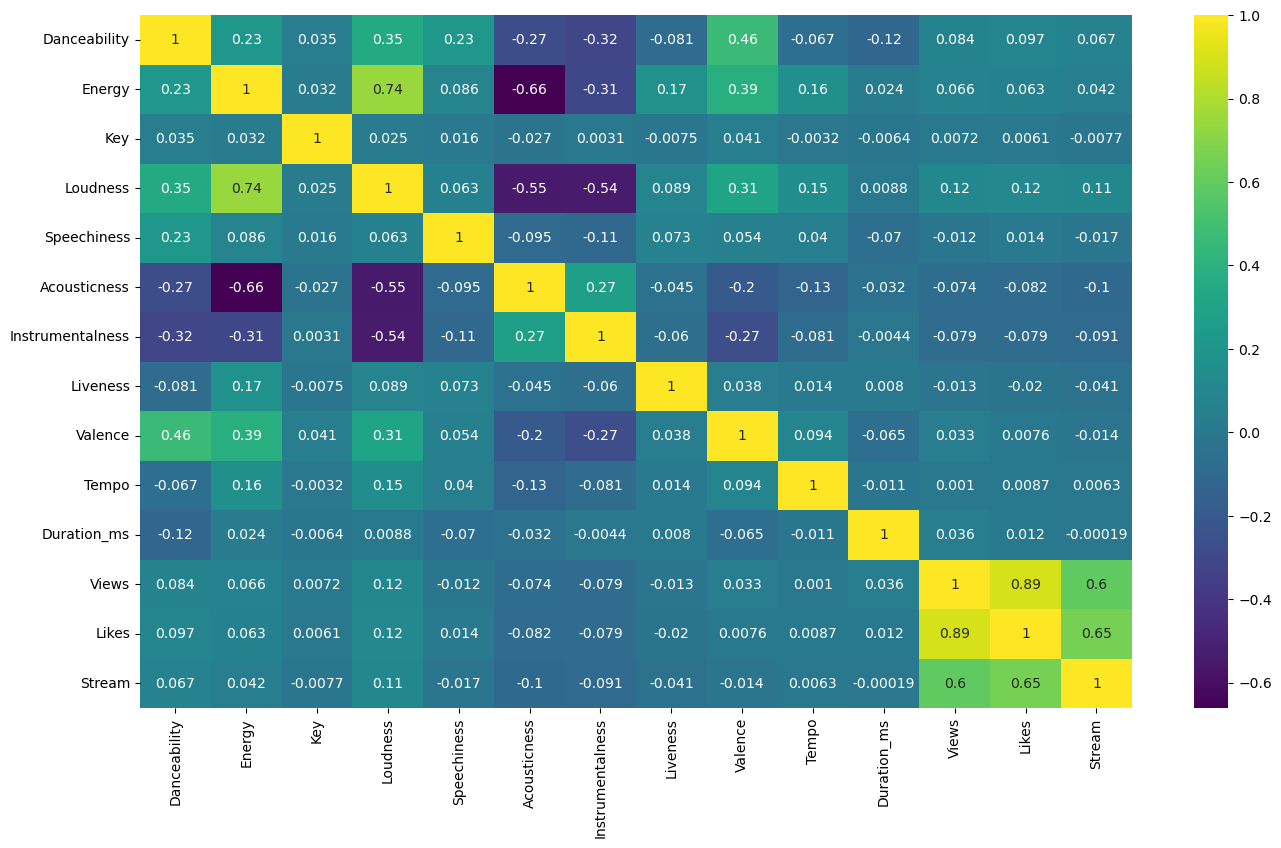

In [26]:
num_columns= df.select_dtypes(include=[np.number]).columns.tolist()

corr= df[num_columns].corr()

plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap='viridis');

# OLS regression

I would like to check if Danceability, Energy, Speechiness, Acousticness, Instrumentalness, Liveness, Valence and Tempo are a good fit for a model where Views, Stream and Likes are the dependent variables.

In [27]:
reg1= 'Views~Danceability+Energy+Speechiness+Acousticness+Instrumentalness+Liveness+Valence+Tempo'
reg1_output=smf.ols(reg1,df_num_columns).fit()

reg2='Stream~Danceability+Energy+Speechiness+Acousticness+Instrumentalness+Liveness+Valence+Tempo'
reg2_output=smf.ols(reg2,df_num_columns).fit()

reg3='Likes~Danceability+Energy+Speechiness+Acousticness+Instrumentalness+Liveness+Valence+Tempo'
reg3_output=smf.ols(reg3,df_num_columns).fit()

In [28]:
print(reg1_output.summary())

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     30.44
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           9.25e-48
Time:                        12:52:52   Log-Likelihood:            -3.5173e+05
No. Observations:               16933   AIC:                         7.035e+05
Df Residuals:                   16924   BIC:                         7.035e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.576e+07   1.58e+07  

In [29]:
print(reg2_output.summary())

                            OLS Regression Results                            
Dep. Variable:                 Stream   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     50.88
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           6.16e-82
Time:                        12:52:52   Log-Likelihood:            -3.5006e+05
No. Observations:               16933   AIC:                         7.001e+05
Df Residuals:                   16924   BIC:                         7.002e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.753e+08   1.43e+07  

In [30]:
print(reg3_output.summary())

                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     39.21
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.98e-62
Time:                        12:52:52   Log-Likelihood:            -2.6621e+05
No. Observations:               16933   AIC:                         5.324e+05
Df Residuals:                   16924   BIC:                         5.325e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.757e+05   1.01e+05  

Looking at the results it can be noticed that most of the independent variables in all three models are statistically significant at the 0.05 level. The major exception from this rule is Tempo which was insignificant in all three models. However, when looking at the coefficients one might say that they are rather questionable. What is more, the condition number is large in all three models which can indicate strong multicollinearity of independent variables. Clearing the data from large outliers might also help with fitting the variables to the model. In summary, all models would need much more work to be relevant.